In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r=model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8627 - loss: 0.4716 - val_accuracy: 0.9562 - val_loss: 0.1420
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9556 - loss: 0.1523 - val_accuracy: 0.9675 - val_loss: 0.1039
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9674 - loss: 0.1066 - val_accuracy: 0.9716 - val_loss: 0.0903
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9744 - loss: 0.0847 - val_accuracy: 0.9760 - val_loss: 0.0793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9770 - loss: 0.0738 - val_accuracy: 0.9771 - val_loss: 0.0752
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0626 - val_accuracy: 0.9787 - val_loss: 0.0700
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9814 - loss: 0.0578 - val_accuracy: 0.9802 - val_loss: 0.0691
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0490 

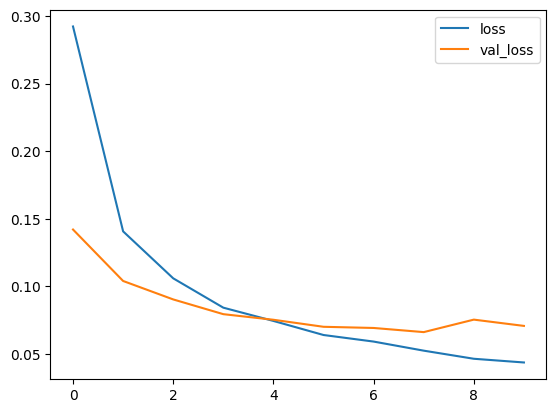

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

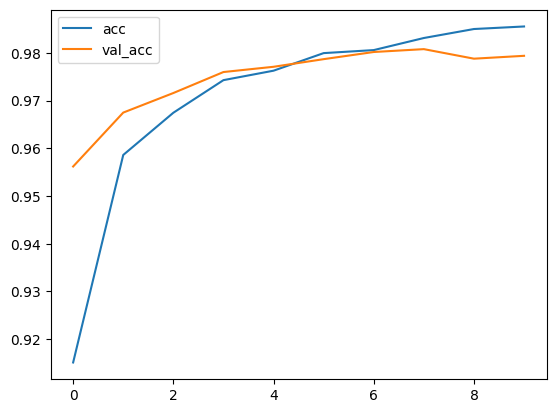

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0828
[0.07066396623849869, 0.9793999791145325]


In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

cm = confusion_matrix(y_test, y_pred_classes)
cm


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 971,    1,    2,    2,    0,    1,    1,    1,    1,    0],
       [   0, 1125,    4,    1,    0,    1,    2,    0,    2,    0],
       [   5,    0, 1009,    2,    1,    0,    2,    6,    6,    1],
       [   0,    0,    9,  982,    0,    8,    0,    3,    2,    6],
       [   1,    0,    2,    0,  957,    0,    5,    2,    2,   13],
       [   2,    0,    0,    9,    1,  867,    5,    2,    4,    2],
       [   4,    3,    0,    1,    6,    4,  938,    0,    2,    0],
       [   2,    5,   10,    0,    1,    0,    0, 1001,    2,    7],
       [   1,    1,    2,    4,    4,    2,    0,    3,  953,    4],
       [   0,    2,    0,    2,    6,    4,    0,    4,    0,  991]])

Text(0.5, 1.0, 'True Label: 2 Predicted: 9')

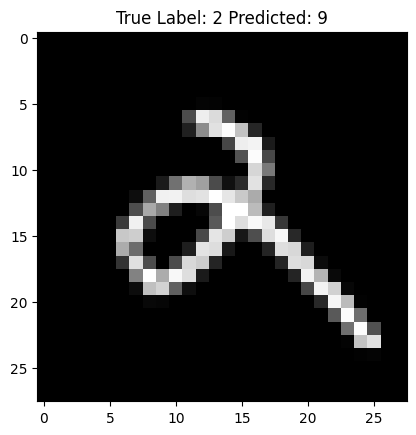

In [16]:
misclassification = np.where(y_test != y_pred_classes)
i = np.random.choice(misclassification[0])
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (y_test[i], y_pred_classes[i]))